In [ ]:
# Mounting drive
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing libraries
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading Training data
btc_train= pandas.read_csv('/content/drive/My Drive/Datasets/Fluid AI assignment/BTC USD/BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv', 
                           index_col= 'Date', parse_dates= True, engine= 'python')
nasdaq_train= pandas.read_csv('/content/drive/My Drive/Datasets/Fluid AI assignment/NASDAQ Data/NASDAQ Training Data - 1st Jan 2016 to 1st Jan 2022.csv',
                           index_col= 'Date', parse_dates= True, engine= 'python')
nse_train= pandas.read_csv('/content/drive/My Drive/Datasets/Fluid AI assignment/NSE Data/NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv',
                           index_col= 'Date', parse_dates= True, engine= 'python')
# Reading Testing data
btc_test= pandas.read_csv('/content/drive/My Drive/Datasets/Fluid AI assignment/BTC USD/BTC-USD Out of Time Testing 1st Jan 2022 to 4th Feb 2022.csv',
                           index_col= 'Date', parse_dates= True, engine= 'python')
nasdaq_test= pandas.read_csv('/content/drive/My Drive/Datasets/Fluid AI assignment/NASDAQ Data/NASDAQ Out of Time Data - 1st Jan 2022 to 4th Feb 2022.csv',
                           index_col= 'Date', parse_dates= True, engine= 'python')
nse_test= pandas.read_csv('/content/drive/My Drive/Datasets/Fluid AI assignment/NSE Data/NSE Out of Time Testing Data - 1st Jan 2022 to 4th Feb 2022.csv',
                           index_col= 'Date', parse_dates= True, engine= 'python')

In [ ]:
# Viewing shapes of all dataframes created
print('BTC training set shape is :', btc_train.shape)
print('NASDAQ training set shape is :', nasdaq_train.shape)
print('NSE training set shape is :', nse_train.shape)
print('BTC testing set shape is :', btc_test.shape)
print('NASDAQ testing set shape is :', nasdaq_test.shape)
print('NSE testing set shape is :', nse_test.shape)

BTC training set shape is : (2193, 6)
NASDAQ training set shape is : (1259, 6)
NSE training set shape is : (1481, 6)
BTC testing set shape is : (35, 6)
NASDAQ testing set shape is : (23, 6)
NSE testing set shape is : (23, 6)


In [ ]:
# Combining training and testing sets
btc= pandas.concat([btc_train, btc_test], axis= 0)
nasdaq= pandas.concat([nasdaq_train, nasdaq_test], axis= 0)
nse= pandas.concat([nse_train, nse_test], axis= 0)

In [ ]:
# Checking null and duplicate values in BTC dataframe
print(btc.isnull().sum())
print(btc.duplicated().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
1


In [ ]:
# Dropping duplicate value
btc.drop_duplicates(inplace= True)
# Checking again
print(btc.duplicated().sum())

0


In [ ]:
# Checking null and duplicate values in NASDAQ dataframe
print(nasdaq.isnull().sum())
print(nasdaq.duplicated().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0


In [ ]:
# Checking null and duplicate values in NSE dataframe
print(nse.isnull().sum())
print(nse.duplicated().sum())

Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64
5


In [ ]:
# Filling null values with median and dropping duplicate values in NSE
nse['Open'].fillna(nse['Open'].median(), inplace= True)
nse['High'].fillna(nse['High'].median(), inplace= True)
nse['Low'].fillna(nse['Low'].median(), inplace= True)
nse['Close'].fillna(nse['Close'].median(), inplace= True)
nse['Adj Close'].fillna(nse['Adj Close'].median(), inplace= True)
nse['Volume'].fillna(nse['Volume'].median(), inplace= True)
nse.drop_duplicates(inplace= True)

In [ ]:
# Checking again
print(nse.isnull().sum())
print(nse.duplicated().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0


In [ ]:
# Viewing columns of btc. Same will be for nasdaq and nse.
btc.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
# Viewing first 3 rows of btc. Same will be for nasdaq and nse.
btc.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800


In [ ]:
# Viewing information about btc. Same will be for nasdaq and nse.
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2227 entries, 2016-01-01 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2227 non-null   float64
 1   High       2227 non-null   float64
 2   Low        2227 non-null   float64
 3   Close      2227 non-null   float64
 4   Adj Close  2227 non-null   float64
 5   Volume     2227 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 121.8 KB


In [ ]:
btc.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

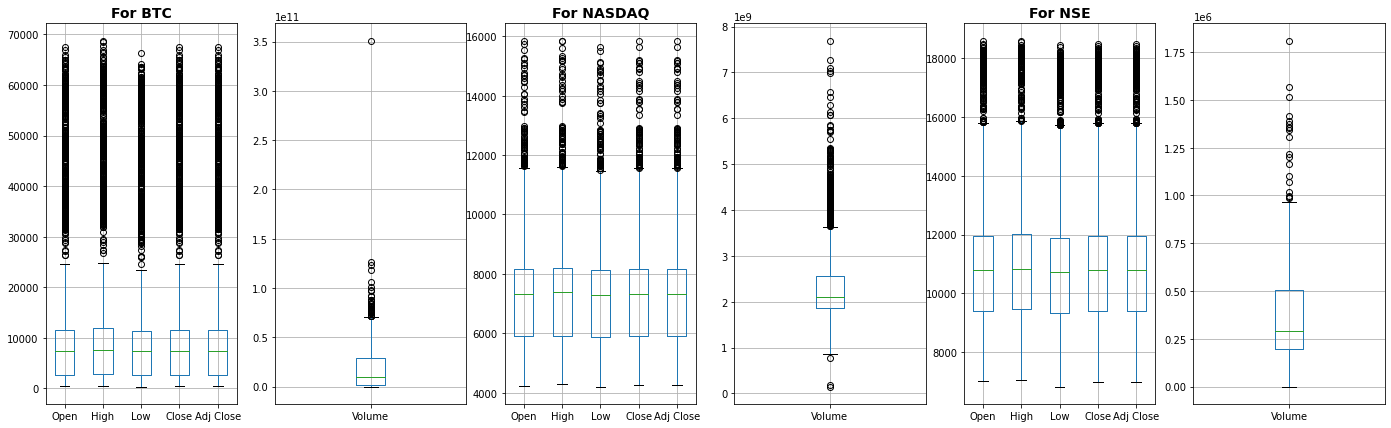

In [ ]:
# Plotting boxplots
plt.figure(figsize= (24, 7))
plt.subplot(1, 6, 1)
plt.title('For BTC', fontsize= 14, fontweight= 'bold')
btc.boxplot(['Open', 'High', 'Low', 'Close', 'Adj Close'])
plt.subplot(1, 6, 2)
btc.boxplot(['Volume'])
plt.subplot(1, 6, 3)
plt.title('For NASDAQ', fontsize= 14, fontweight= 'bold')
nasdaq.boxplot(['Open', 'High', 'Low', 'Close', 'Adj Close'])
plt.subplot(1, 6, 4)
nasdaq.boxplot(['Volume'])
plt.subplot(1, 6, 5)
plt.title('For NSE', fontsize= 14, fontweight= 'bold')
nse.boxplot(['Open', 'High', 'Low', 'Close', 'Adj Close'])
plt.subplot(1, 6, 6)
nse.boxplot(['Volume'])
plt.show()

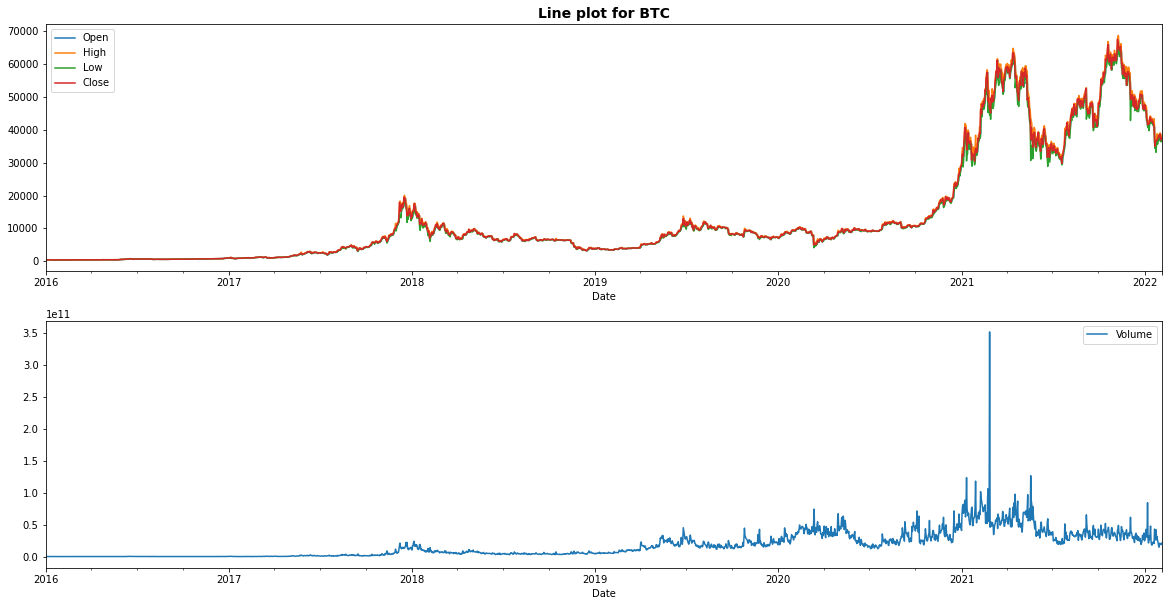

In [ ]:
# Line plot for BTC
plt.figure(figsize= (20, 10))
plt.subplot(2, 1, 1)
plt.title('Line plot for BTC', fontsize= 14, fontweight= 'bold')
btc['Open'].plot()
btc['High'].plot()
btc['Low'].plot()
btc['Close'].plot()
plt.legend()
plt.subplot(2, 1, 2)
btc['Volume'].plot()
plt.legend()
plt.show()

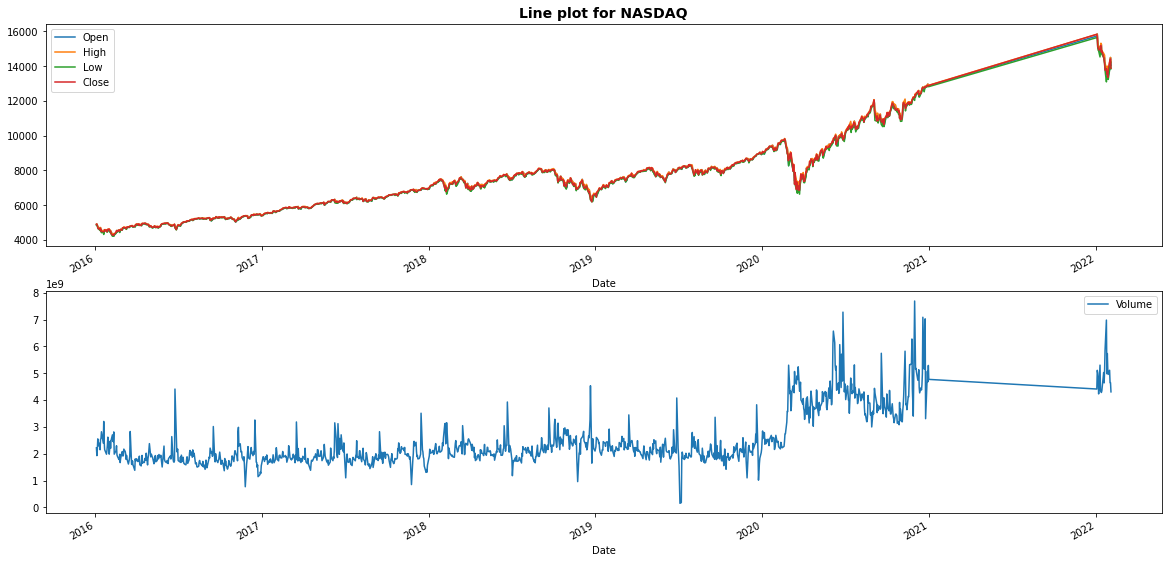

In [ ]:
# Line plot for NASDAQ
plt.figure(figsize= (20, 10))
plt.subplot(2, 1, 1)
plt.title('Line plot for NASDAQ', fontsize= 14, fontweight= 'bold')
nasdaq['Open'].plot()
nasdaq['High'].plot()
nasdaq['Low'].plot()
nasdaq['Close'].plot()
plt.legend()
plt.subplot(2, 1, 2)
nasdaq['Volume'].plot()
plt.legend()
plt.show()

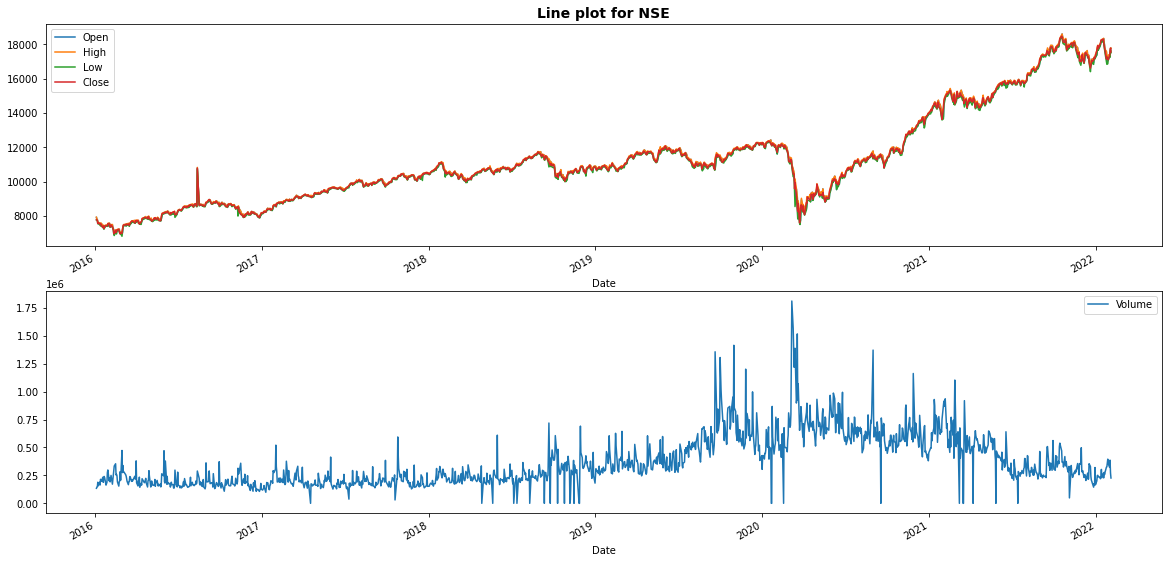

In [ ]:
# Line plot for NSE
plt.figure(figsize= (20, 10))
plt.subplot(2, 1, 1)
plt.title('Line plot for NSE', fontsize= 14, fontweight= 'bold')
nse['Open'].plot()
nse['High'].plot()
nse['Low'].plot()
nse['Close'].plot()
plt.legend()
plt.subplot(2, 1, 2)
nse['Volume'].plot()
plt.legend()
plt.show()

In [ ]:
# Fitting model for btc and checking parameters
x= btc[['Open', 'High', 'Low', 'Volume']]
y= btc[['Close']]
x_train= x[0: 2193]
x_test= x[2193: ]
y_train= y[0: 2193]
y_test= y[2193: ]
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
print('Training Accuracy score is :', r2_score(y_train, (lr.predict(x_train))).round(decimals= 5) *100, '%')
print('Testing Accuracy score is :', r2_score(y_test, y_pred).round(decimals= 5) *100, '%')
print('Mean squared error is :', mean_squared_error(y_test, y_pred).round(decimals= 3))
print('Root Mean squared error is :', numpy.sqrt(mean_squared_error(y_test, y_pred)).round(decimals= 3))
print('Mean absolute error is :', mean_absolute_error(y_test, y_pred).round(decimals= 3))

Training Accuracy score is : 99.955 %
Testing Accuracy score is : 95.428 %
Mean squared error is : 483174.216
Root Mean squared error is : 695.107
Mean absolute error is : 529.533


In [ ]:
y_test.rename(columns= {'Close': 'Actual_Close'}, inplace= True)
y_pred= pandas.DataFrame(y_pred, columns= ['Predicted_Close'], index= y_test.index)
df= pandas.concat([y_test, y_pred], axis= 1)
# Writing DataFrame to excel
df.to_excel('BTC prediction.xlsx')
# Downloading the excel file
files.download('BTC prediction.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

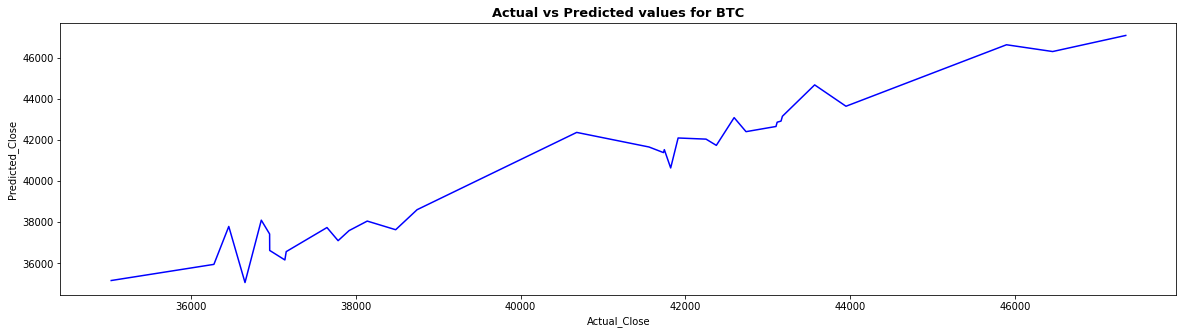

In [ ]:
# Actual vs Predicted values for BTC
plt.figure(figsize= (20, 5))
seaborn.lineplot(df['Actual_Close'], df['Predicted_Close'], color= 'blue')
plt.title('Actual vs Predicted values for BTC', fontsize= 13, fontweight= 'bold')
plt.show()

In [ ]:
# Fitting model for nasdaq and checking parameters
x= nasdaq[['Open', 'High', 'Low', 'Volume']]
y= nasdaq[['Close']]
x_train= x[0: 1259]
x_test= x[1259: ]
y_train= y[0: 1259]
y_test= y[1259: ]
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
print('Training Accuracy score is :', r2_score(y_train, (lr.predict(x_train))).round(decimals= 6) *100, '%')
print('Testing Accuracy score is :', r2_score(y_test, y_pred).round(decimals= 6) *100, '%')
print('Mean squared error is :', mean_squared_error(y_test, y_pred).round(decimals= 3))
print('Root Mean squared error is :', numpy.sqrt(mean_squared_error(y_test, y_pred)).round(decimals= 3))
print('Mean absolute error is :', mean_absolute_error(y_test, y_pred).round(decimals= 3))

Training Accuracy score is : 99.9625 %
Testing Accuracy score is : 96.0471 %
Mean squared error is : 18108.807
Root Mean squared error is : 134.569
Mean absolute error is : 112.158


In [ ]:
y_test.rename(columns= {'Close': 'Actual_Close'}, inplace= True)
y_pred= pandas.DataFrame(y_pred, columns= ['Predicted_Close'], index= y_test.index)
df= pandas.concat([y_test, y_pred], axis= 1)
df.to_excel('NASDAQ prediction.xlsx')
files.download('NASDAQ prediction.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

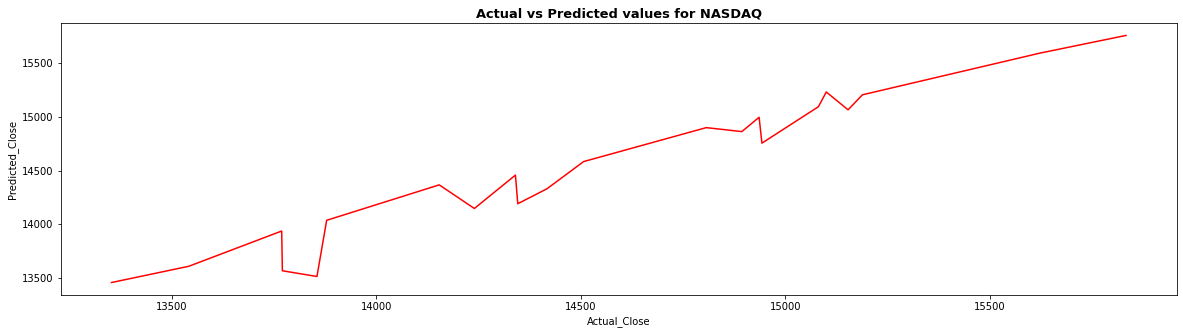

In [ ]:
# Actual vs Predicted values for NASDAQ
plt.figure(figsize= (20, 5))
seaborn.lineplot(df['Actual_Close'], df['Predicted_Close'], color= 'red')
plt.title('Actual vs Predicted values for NASDAQ', fontsize= 13, fontweight= 'bold')
plt.show()

In [ ]:
# Fitting model for nse and checking parameters
x= nse[['Open', 'High', 'Low', 'Volume']]
y= nse[['Close']]
x_train= x[0: 1481]
x_test= x[1481: ]
y_train= y[0: 1481]
y_test= y[1481: ]
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
print('Training Accuracy score is :', r2_score(y_train, (lr.predict(x_train))).round(decimals= 5) *100, '%')
print('Testing Accuracy score is :', r2_score(y_test, y_pred).round(decimals= 5) *100, '%')
print('Mean squared error is :', mean_squared_error(y_test, y_pred).round(decimals= 3))
print('Root Mean squared error is :', numpy.sqrt(mean_squared_error(y_test, y_pred)).round(decimals= 3))
print('Mean absolute error is :', mean_absolute_error(y_test, y_pred).round(decimals= 3))

Training Accuracy score is : 99.981 %
Testing Accuracy score is : 97.165 %
Mean squared error is : 4771.155
Root Mean squared error is : 69.074
Mean absolute error is : 45.206


In [ ]:
y_test.rename(columns= {'Close': 'Actual_Close'}, inplace= True)
y_pred= pandas.DataFrame(y_pred, columns= ['Predicted_Close'], index= y_test.index)
df= pandas.concat([y_test, y_pred], axis= 1)
df.to_excel('NSE prediction.xlsx')
files.download('NSE prediction.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

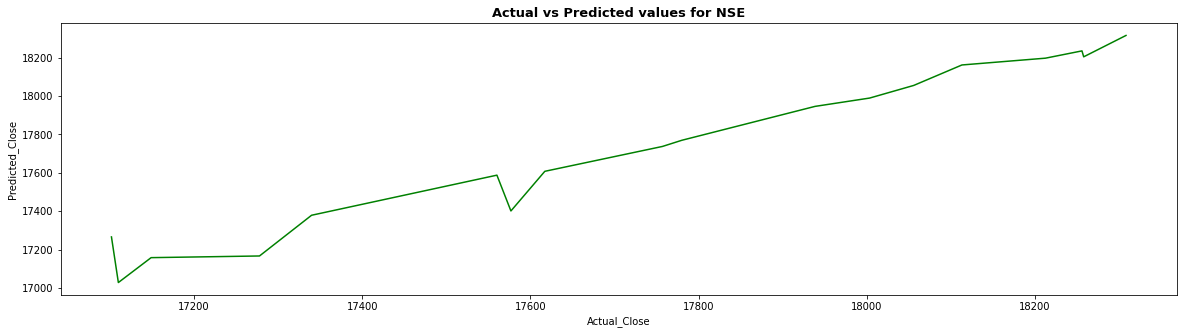

In [ ]:
# Actual vs Predicted values for NSE
plt.figure(figsize= (20, 5))
seaborn.lineplot(df['Actual_Close'], df['Predicted_Close'], color= 'green')
plt.title('Actual vs Predicted values for NSE', fontsize= 13, fontweight= 'bold')
plt.show()